In [1]:
import random, time, os, sys, json
from tqdm import tqdm

In [2]:
# import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import pandas as pd

In [19]:
df = pd.read_csv("./outputs/record_err_1024.csv")
df

,Unnamed: 0,method,seed,mse,mean,std,params,time
0,0,pair,147,0.322931,0.489599,0.288485,20480,0.000707
1,1,block-sqrt-half,147,0.302928,0.469618,0.287032,49152,0.000182
2,2,block-sqrt,147,0.296015,0.462491,0.286562,65536,0.000363
3,3,lowR-same-param,147,0.295840,0.462425,0.286363,65536,0.000092
4,4,lowR-samex2,147,0.263381,0.430013,0.280126,65536,0.000081
...,...,...,...,...,...,...,...,...
99,99,lowR-same-param,753,0.296028,0.462762,0.286145,65536,0.000061
100,100,lowR-samex2,753,0.263451,0.430123,0.280080,65536,0.000059
101,101,lowR-half,753,0.035274,0.149878,0.113186,1048576,0.000062
102,102,pair-Add,753,0.238089,0.404729,0.272550,204800,0.041203


In [20]:
df.columns

Index(['Unnamed: 0', 'method', 'seed', 'mse', 'mean', 'std', 'params', 'time'], dtype='object')

In [21]:
df = df.drop(columns = df.columns[0])

In [22]:
df.head(20)

,method,seed,mse,mean,std,params,time
0,pair,147,0.322931,0.489599,0.288485,20480,0.000707
1,block-sqrt-half,147,0.302928,0.469618,0.287032,49152,0.000182
2,block-sqrt,147,0.296015,0.462491,0.286562,65536,0.000363
3,lowR-same-param,147,0.295840,0.462425,0.286363,65536,0.000092
4,lowR-samex2,147,0.263381,0.430013,0.280126,65536,0.000081
5,lowR-half,147,0.035401,0.150188,0.113334,1048576,0.000091
6,pair-Add,147,0.237912,0.404372,0.272755,204800,0.041148
7,pair-Seq,147,0.238152,0.404701,0.272706,204800,0.023249
8,pair,258,0.323169,0.489720,0.288692,20480,0.000592
9,block-sqrt-half,258,0.303172,0.469721,0.287287,49152,0.000179


In [23]:
methods = list(df['method'].unique())
methods

['pair',
 'block-sqrt-half',
 'block-sqrt',
 'lowR-same-param',
 'lowR-samex2',
 'lowR-half',
 'pair-Add',
 'pair-Seq']

In [29]:
mse_vals = []
mae_vals = []
mean_time = []
params = []

for m in methods:
    tdf = df.loc[df['method'] == m]
    mse = tdf['mse'].mean()
    mae = tdf['mean'].mean()
    tim = tdf['time'].mean()
    parm = tdf['params'].iloc[0]
    
    mse_vals += [mse]
    mae_vals += [mae]
    mean_time += [tim*1000]
    params += [parm]


In [30]:
mse_vals

[0.32329872479805577,
 0.30327299466499913,
 0.2963841190704933,
 0.29605421882409316,
 0.2634975268290593,
 0.03543012474591911,
 0.23819100742156685,
 0.23821138074764836]

In [31]:
for i in range(len(methods)):
    print(f"METHOD {methods[i]}: \t mse {mse_vals[i]:.4f} \t time {mean_time[i]:.5f} \tparam: {params[i]}")

METHOD pair: 	 mse 0.3233 	 time 0.62576 	param: 20480
METHOD block-sqrt-half: 	 mse 0.3033 	 time 0.17918 	param: 49152
METHOD block-sqrt: 	 mse 0.2964 	 time 0.36348 	param: 65536
METHOD lowR-same-param: 	 mse 0.2961 	 time 0.06237 	param: 65536
METHOD lowR-samex2: 	 mse 0.2635 	 time 0.05784 	param: 65536
METHOD lowR-half: 	 mse 0.0354 	 time 0.06032 	param: 1048576
METHOD pair-Add: 	 mse 0.2382 	 time 41.17582 	param: 204800
METHOD pair-Seq: 	 mse 0.2382 	 time 23.13900 	param: 204800


In [33]:
data_dict = {'method':methods, 'mse':mse_vals, 'mae':mae_vals, 'time(ms)':mean_time, 'parameters':params}
data_df = pd.DataFrame(data_dict)
data_df

,method,mse,mae,time(ms),parameters
0,pair,0.323299,0.489957,0.625757,20480
1,block-sqrt-half,0.303273,0.469882,0.179181,49152
2,block-sqrt,0.296384,0.462908,0.363478,65536
3,lowR-same-param,0.296054,0.462696,0.062374,65536
4,lowR-samex2,0.263498,0.430128,0.057844,65536
5,lowR-half,0.035430,0.150226,0.060320,1048576
6,pair-Add,0.238191,0.404685,41.175824,204800
7,pair-Seq,0.238211,0.404706,23.139000,204800


In [34]:
mkr = ['P']*3 + ['*']*3 + ['o'] + ['.']*10

In [35]:
mkr

['P',
 'P',
 'P',
 '*',
 '*',
 '*',
 'o',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.']

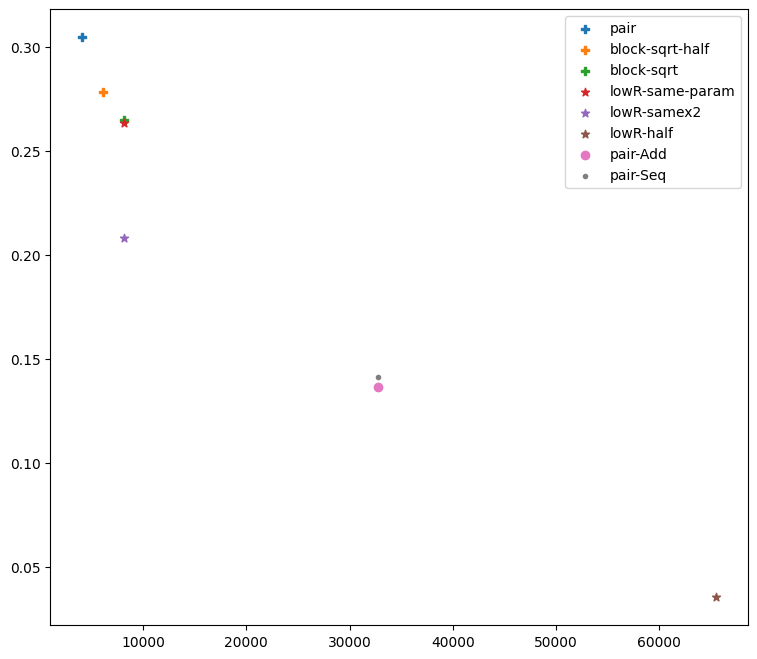

In [13]:
fig = plt.figure(figsize=(9, 8))
for i, m in enumerate(methods):
    plt.scatter(params[i], mse_vals[i], label=f'{m}', marker=mkr[i])
plt.legend()

# Load All dimension and summarize

In [37]:
for dimN in [16, 64, 256, 1024, 4096]:
    df = pd.read_csv(f"./outputs/record_err_{dimN}.csv")
    df = df.drop(columns = df.columns[0])
    
    methods = list(df['method'].unique())
    
    mse_vals = []
    mae_vals = []
    mean_time = []
    params = []

    for m in methods:
        tdf = df.loc[df['method'] == m]
        mse = tdf['mse'].mean()
        mae = tdf['mean'].mean()
        tim = tdf['time'].mean()
        parm = tdf['params'].iloc[0]

        mse_vals += [mse]
        mae_vals += [mae]
        mean_time += [tim*1000]
        params += [parm]

    
    data_dict = {'method':methods, 'mse':mse_vals, 'mae':mae_vals, 'time':mean_time, 'parameters':params}
    data_df = pd.DataFrame(data_dict)
    print(data_df)
#     for i in range(len(methods)):
#         data_dict['method'].append(methods[i])
#         data_dict['mse'].append(mse_vals[i])
#         data_dict['mae'].append(mae_vals[i])
#         data_dict['time'].append(mean_time[i])
#         data_dict['parameters'].append(params[i])

            method           mse       mae      time  parameters
0             pair  1.714306e-01  0.326784  0.270935         128
1  block-sqrt-half  1.714306e-01  0.326786  0.226699         128
2       block-sqrt  1.366959e-01  0.289110  0.119246         128
3  lowR-same-param  1.232694e-01  0.278669  0.060283         128
4      lowR-samex2  3.332929e-02  0.142444  0.050050         128
5        lowR-half  3.332929e-02  0.142444  0.048142         256
6         pair-Add  1.239605e-07  0.000207  1.150168         512
7         pair-Seq  7.800662e-04  0.017121  1.125758         512
            method       mse       mae      time  parameters
0             pair  0.260479  0.425614  0.396618         768
1  block-sqrt-half  0.240193  0.404960  0.176448         768
2       block-sqrt  0.212060  0.375324  0.117669        1024
3  lowR-same-param  0.208368  0.374550  0.055735        1024
4      lowR-samex2  0.126237  0.284899  0.050086        1024
5        lowR-half  0.035452  0.149715  0.049078 

In [ ]:

    
    print(f"METHOD {methods[i]}: \t mse {mse_vals[i]:.4f} \t time {mean_time[i]:.5f} \tparam: {params[i]}")